<a href="https://colab.research.google.com/github/jamestheengineer/data-science-from-scratch-Python/blob/master/Chapter_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Multiple regression


# Only do this once per VM, otherwise you'll get multiple clones and nested directories
!git clone https://github.com/jamestheengineer/data-science-from-scratch-Python.git
%cd data-science-from-scratch-Python/
!pip install import-ipynb
import import_ipynb

Cloning into 'data-science-from-scratch-Python'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 297 (delta 63), reused 9 (delta 5), pack-reused 187
Receiving objects: 100% (297/297), 1.07 MiB | 1.21 MiB/s, done.
Resolving deltas: 100% (171/171), done.
/content/data-science-from-scratch-Python
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=1b86530bd240acb79ad33c0ee8c9eab0a67e1eb6e1e65946ea638106fa0e83c7
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [2]:
from Chapter_04 import dot, Vector

def predict(x: Vector, beta: Vector) -> float:
  """assumes that the first element of x is 1"""
  return dot(x, beta)

from typing import List

def error(x: Vector, y: float, beta: Vector) -> float:
  return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
  return error(x, y, beta) ** 2

x = [1, 2, 3]
y = 30
beta = [4, 4, 4] # so prediction = 4 + 8 + 12 = 24

assert error(x,y,beta) == -6
assert squared_error(x, y, beta) == 36


importing Jupyter notebook from Chapter_04.ipynb


In [3]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
  err = error(x, y, beta)
  return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]


importing Jupyter notebook from Chapter_08.ipynb


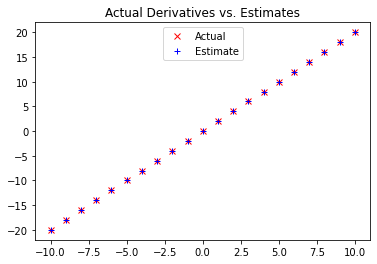

Streaming output truncated to the last 5000 lines.
1102 [19.999727750581208, 4.546704554196063]
1103 [19.99972829491653, 4.547610872838252]
1104 [19.999728838163513, 4.548515379387492]
1105 [19.999729380324325, 4.549418077466881]
1106 [19.99972992140114, 4.550318970692271]
1107 [19.99973046139613, 4.551218062672288]
1108 [19.999731000311453, 4.55211535700834]
1109 [19.99973153814927, 4.553010857294635]
1110 [19.99973207491173, 4.553904567118195]
1111 [19.999732610600994, 4.55479649005887]
1112 [19.999733145219196, 4.555686629689354]
1113 [19.999733678768486, 4.556574989575194]
1114 [19.999734211250995, 4.557461573274812]
1115 [19.99973474266886, 4.558346384339513]
1116 [19.99973527302421, 4.559229426313503]
1117 [19.999735802319165, 4.5601107027339]
1118 [19.99973633055585, 4.560990217130752]
1119 [19.999736857736377, 4.561867973027046]
1120 [19.999737383862865, 4.562743973938728]
1121 [19.99973790893741, 4.563618223374713]
1122 [19.999738432962122, 4.564490724836901]
1123 [19.99973895

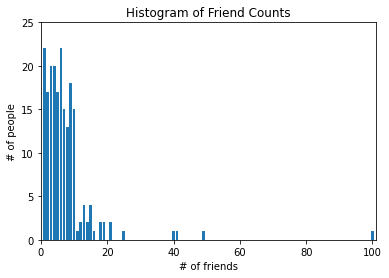

least squares fit:   4%|▍         | 192/5000 [00:00<00:02, 1919.39it/s]

204 1 100.0 1 49
6.0


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1948.53it/s]

[30.514795945185586, 0.9748274277323267, -1.8506912934343662, 0.91407780744768]


In [4]:
import random
import tqdm
from Chapter_04 import vector_mean
from Chapter_08 import gradient_step

def least_square_fit(xs: List[Vector],
                     ys: List[float],
                     learning_rate: float = 0.001,
                     num_steps: int = 1000,
                     batch_size: int = 1) -> Vector:
    """
    Find the beta that minimizes the sum of squared errors
    assuming the model y = dot(x, beta).
    """
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.trange(num_steps, desc="least squares fit"):
      for start in range(0, len(xs), batch_size):
        batch_xs = xs[start:start+batch_size]
        batch_ys = ys[start:start+batch_size]

        gradient = vector_mean([sqerror_gradient(x, y, guess)
                                for x, y in zip(batch_xs, batch_ys)])
        guess = gradient_step(guess, gradient, -learning_rate)

    return guess

from Chapter_05 import daily_minutes_good
from Chapter_08 import gradient_step

random.seed(0)
# Trial and error used to choose num_iters and step_size
# This will run for a while
learning_rate = 0.001
inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

beta = least_square_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)
assert 30.50 < beta[0] < 30.70 # constant
assert 0.96 < beta[1] < 1.00 # num_friends
assert -1.89 < beta[2] < -1.85 # work hours per day
assert 0.91 < beta[3] < 0.94 # has PhD
print(beta)


In [5]:
from Chapter_14 import total_sum_of_squares

def multipl_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
  sum_of_squared_errors = sum(error(x, y, beta) ** 2
                              for x, y in zip(xs, ys))
  return 1.0 - sum_of_squared_errors / total_sum_of_squares(ys)

assert 0.67 < multipl_r_squared(inputs, daily_minutes_good, beta) < 0.68

loss:41837.653:   1%|          | 71/10000 [00:00<00:14, 689.45it/s]

importing Jupyter notebook from Chapter_14.ipynb


loss:13196.619: 100%|██████████| 10000/10000 [00:13<00:00, 766.60it/s]


In [7]:
# Boostrapping
from typing import TypeVar, Callable

X = TypeVar('X') # Generic type for data
Stat = TypeVar('Stat') # Generic type for "statistic"

def bootstrap_sample(data: List[X]) -> List[X]:
  """randomly samples len(data) elements with replacement"""
  return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 near 0, 50 near 200
far_from_100 = ([99.5 + random.random()] + 
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])

from Chapter_05 import median, standard_deviation

medians_close = bootstrap_statistic(close_to_100, median, 100)
medians_far = bootstrap_statistic(far_from_100, median, 100)

print(medians_close, medians_far)

assert standard_deviation(medians_close) < 1
assert standard_deviation(medians_far) > 90
                                           

[100.06080953268952, 100.02084043415655, 99.99350522356953, 100.00815206269189, 99.98455839235284, 100.02084043415655, 99.98962585836738, 100.0527647699321, 99.98455839235284, 100.05676165358146, 99.98962585836738, 100.02131729994998, 100.03006014891221, 100.04345783324248, 100.07509628350714, 100.06080953268952, 100.02131729994998, 99.97287496701045, 99.93707967370521, 100.08825082574874, 100.00815206269189, 100.06080953268952, 100.03006014891221, 100.05676165358146, 100.00815206269189, 99.95661142284395, 100.05676165358146, 100.03006014891221, 100.0527647699321, 100.02131729994998, 99.98962585836738, 100.03006014891221, 99.91663314095867, 100.02084043415655, 100.02131729994998, 100.03006014891221, 99.97287496701045, 100.0527647699321, 100.00815206269189, 99.97978354183503, 99.91663314095867, 100.00815206269189, 100.06080953268952, 100.03006014891221, 100.02084043415655, 100.07509628350714, 100.02084043415655, 100.00815206269189, 100.07509628350714, 100.04345783324248, 100.05276476993